In [1]:
import pandas as pd

import seaborn as sns
sns.set_theme(style='darkgrid')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

import re

In [2]:
coord_data=pd.read_csv('20J coordination marking.csv')

coord_data.drop(['Name', 'Timestamp'], axis='columns', inplace=True)

coord_data

,C5494124 [Executive summary],C5494124 [Understanding of legal issues],C5494124 [Use data to answer a practical question],C5494124 [Write a report],C5494124 [Technical reflection on the data investigation],C5494124 [Apply appropriate analysis techniques],C5494124 additional comments,F1981013 [Executive summary],F1981013 [Understanding of legal issues],F1981013 [Use data to answer a practical question],...,F8145018 [Technical reflection on the data investigation],F8145018 [Apply appropriate analysis techniques],F8145018 additional comments,H1217342 [Executive summary],H1217342 [Understanding of legal issues],H1217342 [Use data to answer a practical question],H1217342 [Write a report],H1217342 [Technical reflection on the data investigation],H1217342 [Apply appropriate analysis techniques],H1217342 additional comments
0,5,4,6,6,5,6,NaN,7,7,8,...,6,8,"Awarded 6.5 for ""Write a report"" and 7.5 for ""...",8,6,7,7,7,9,"Awarded 7.5 for ""Write a report"" and 8.5 for ""..."
1,5,4,6,5,7,6,NaN,9,8,8,...,7,8,NaN,6,7,6,6,5,5,NaN
2,5,4,3,4,5,4,NaN,8,6,6,...,7,9,NaN,7,7,6,7,6,5,NaN
3,5,4,4,3,2,3,NaN,9,9,8,...,6,7,NaN,5,5,6,4,5,5,NaN
4,5,3,7,5,5,7,NaN,9,6,8,...,8,8,NaN,5,6,5,6,5,5,"Actually 6, 6, 5, 5.5, 5.5, 5 (so -1 on ES, 6 ..."
5,5,3,3,5,4,6,NaN,7,6,4,...,8,8,NaN,6,8,3,5,6,5,NaN
6,5,5,5,5,5,7,NaN,10,6,8,...,7,8,NaN,10,8,5,6,6,5,NaN
7,4,6,8,7,4,6,NaN,9,8,8,...,10,9,NaN,9,8,8,8,6,5,NaN
8,6,5,4,5,6,6,NaN,9,9,10,...,9,9,NaN,7,6,6,6,5,6,NaN
9,5,4,6,5,4,6,NaN,10,10,8,...,10,8,NaN,4,6,2,4,3,2,NaN


In [3]:
pis=['C5494124',
     'F1981013',
     'F8077482',
     'F8145018',
     'H1217342']

In [6]:
marks=pd.DataFrame()

for pi in pis:
    
    data=(coord_data
          .filter(like='[')
          .filter(like=pi)
          .rename(lambda x:re.search('\[(.*)\]', x).group(1), axis='columns'))

    mark=(data['Executive summary'] + 
          data['Understanding of legal issues'] + 
          data['Use data to answer a practical question'] +
          3*data['Write a report'] +
          data['Technical reflection on the data investigation'] +
          3*data['Apply appropriate analysis techniques'])

    marks[pi]=mark
    
marks

,C5494124,F1981013,F8077482,F8145018,H1217342
0,56,76,68,70,76
1,55,77,52,82,57
2,41,50,45,84,62
3,33,67,30,66,48
4,56,85,59,79,54
5,48,76,57,75,53
6,56,82,56,74,62
7,61,86,57,91,70
8,54,94,59,95,60
9,52,83,35,87,33


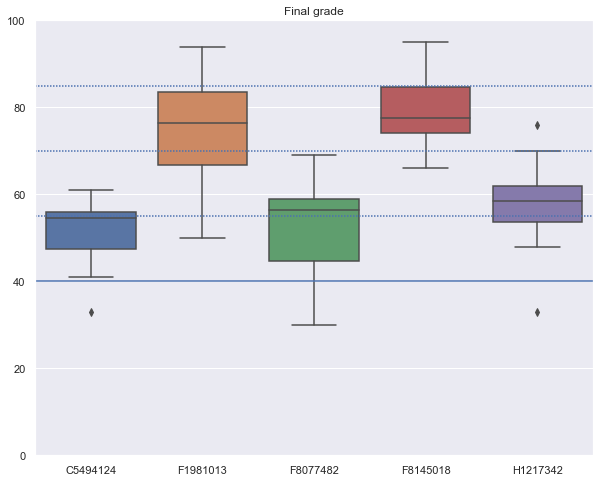

In [7]:
ax=sns.boxplot(data=marks)
ax.set_ylim((0, 100))

ax.axhline(40)
ax.axhline(55, dashes=(1, 1))
ax.axhline(70, dashes=(1, 1))
ax.axhline(85, dashes=(1, 1))

ax.set_title('Final grade')
pass



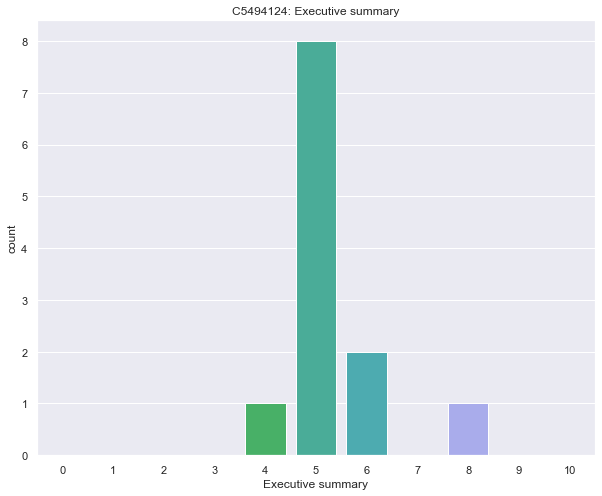

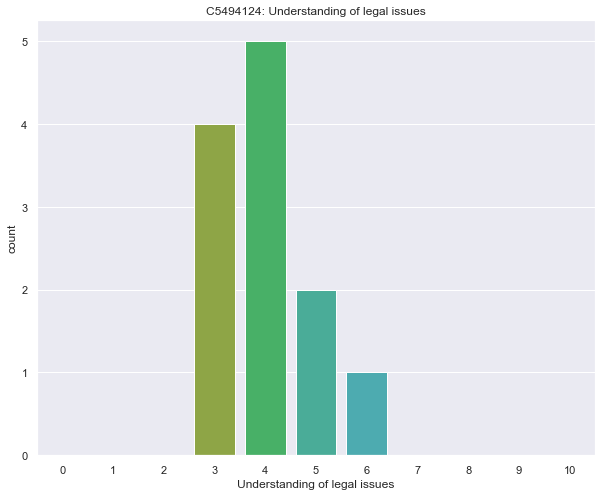

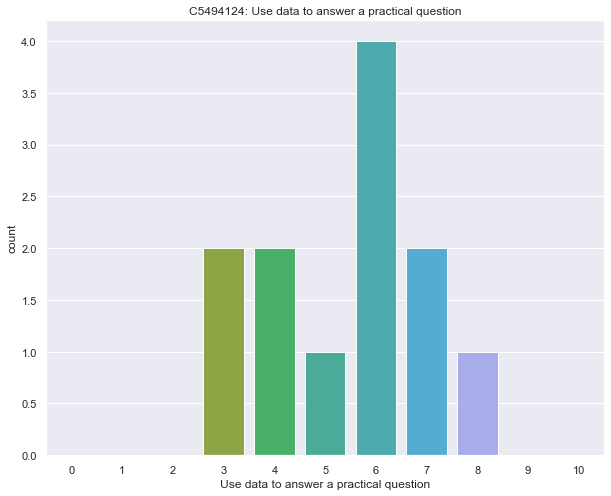

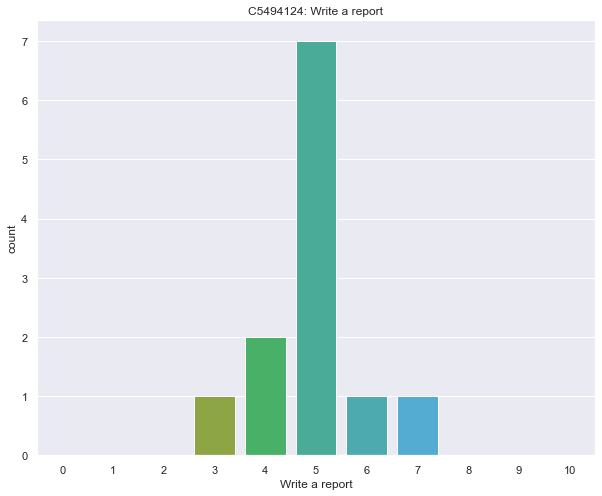

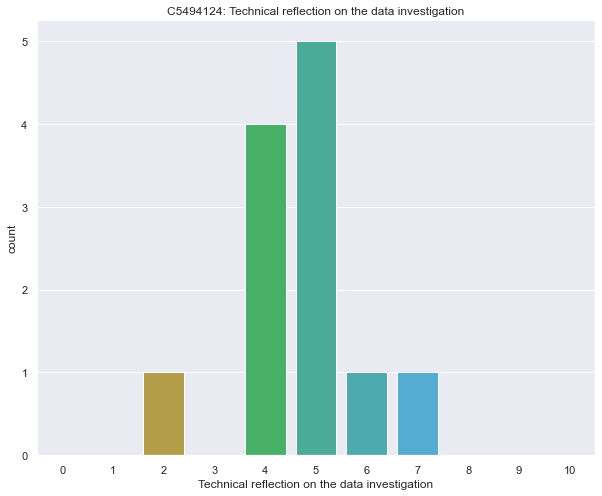

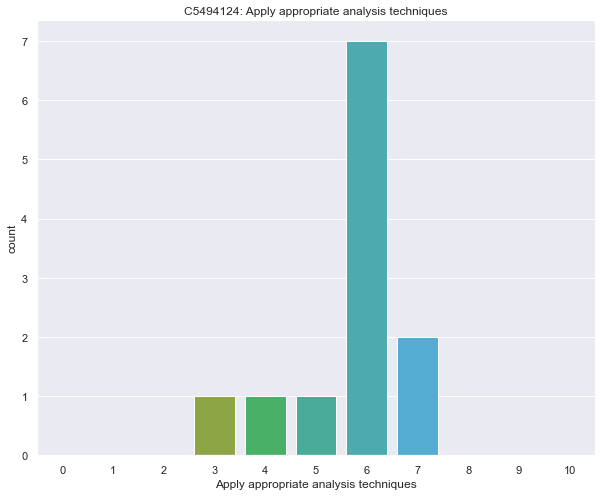







*******************************************





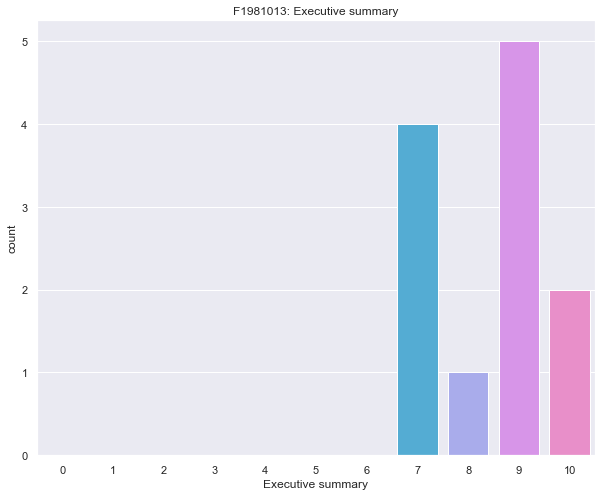

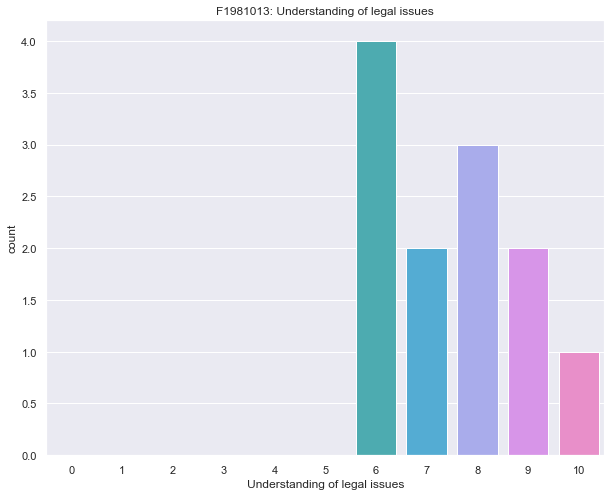

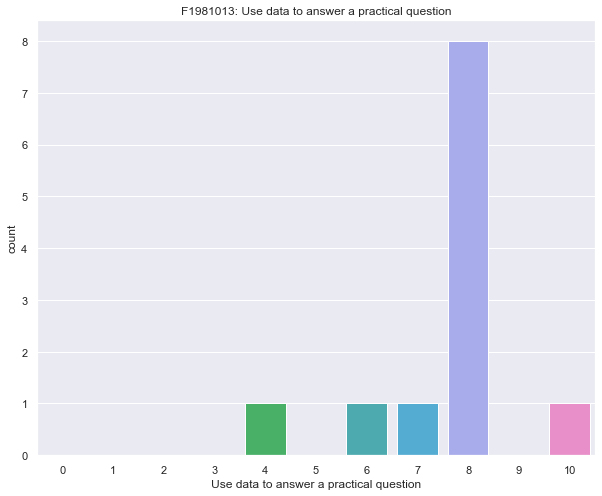

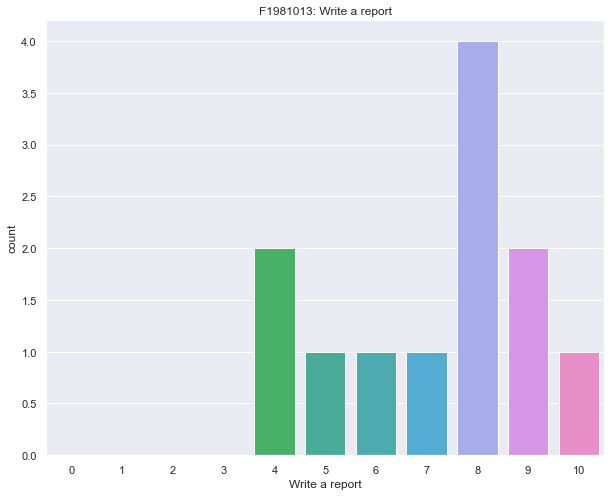

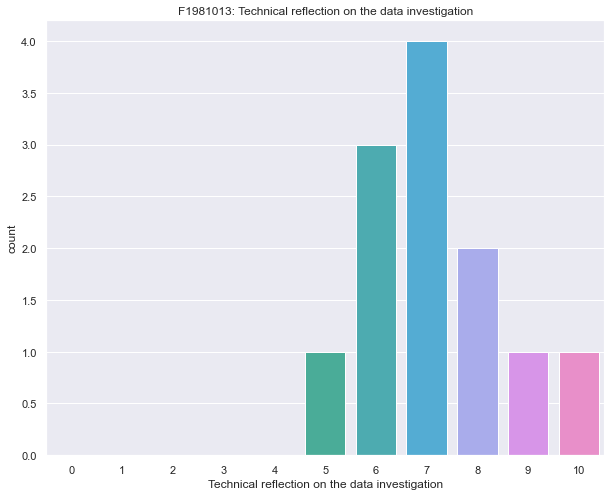

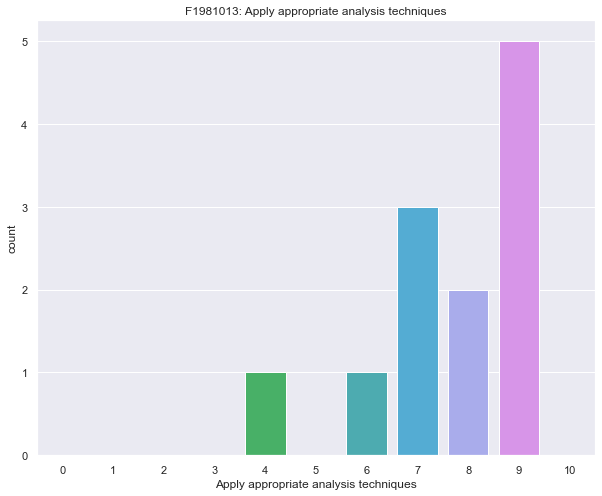







*******************************************





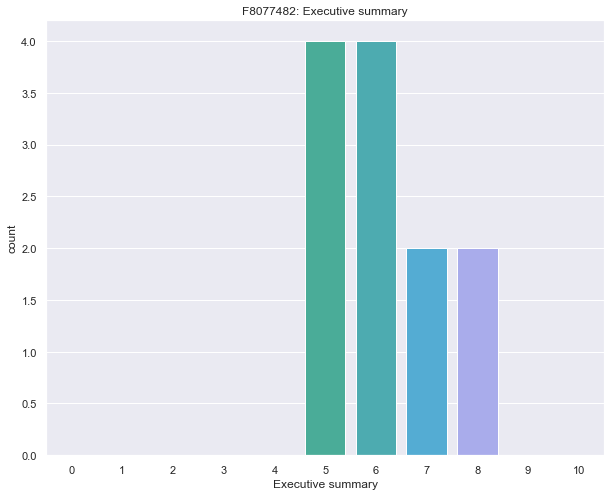

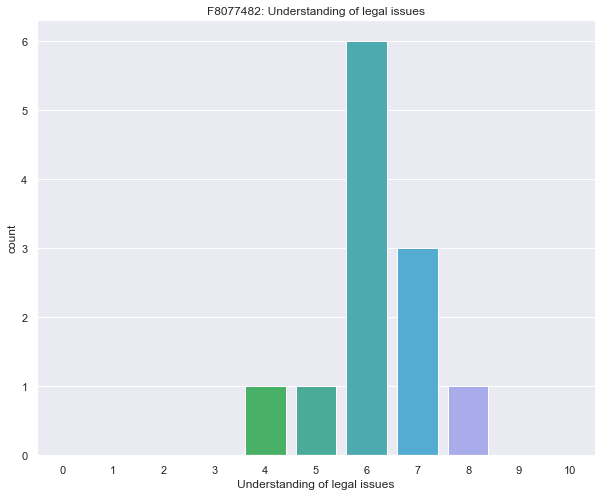

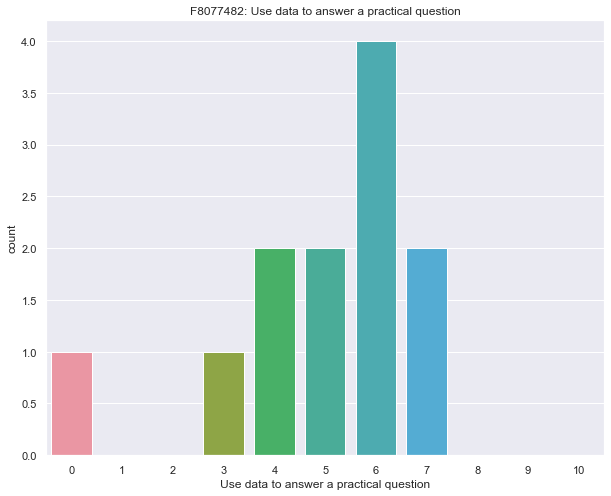

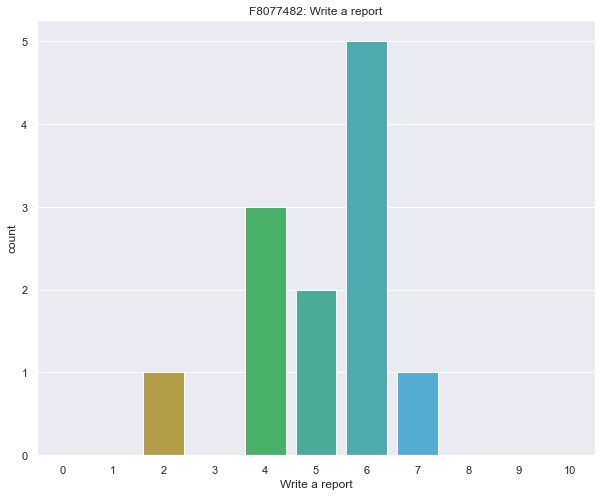

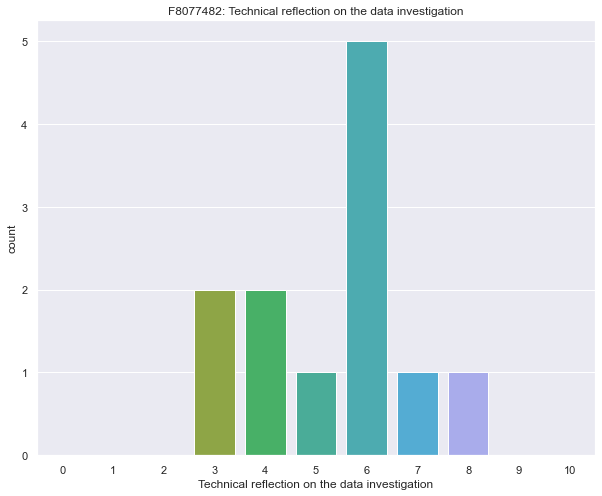

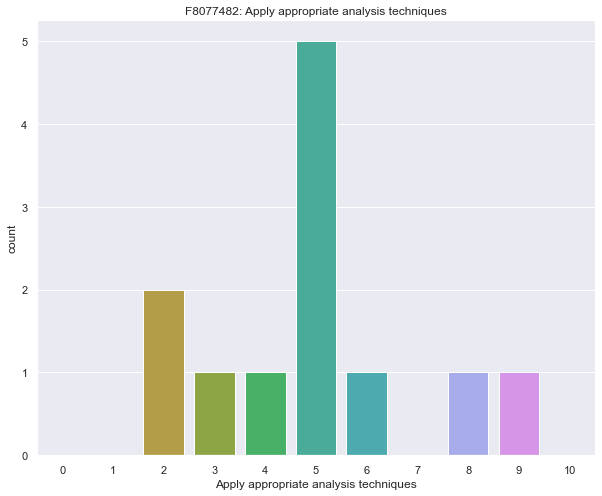







*******************************************





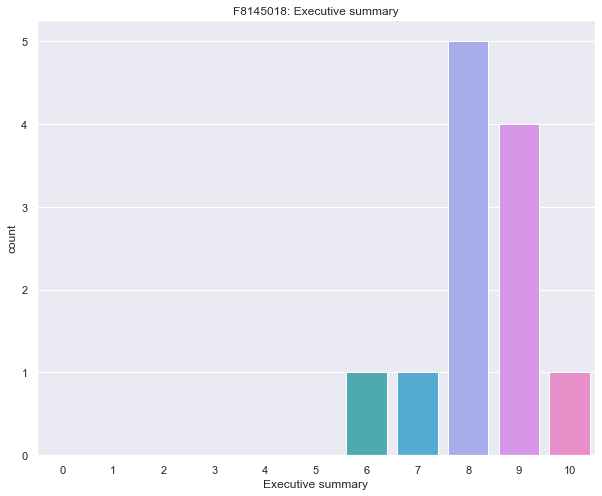

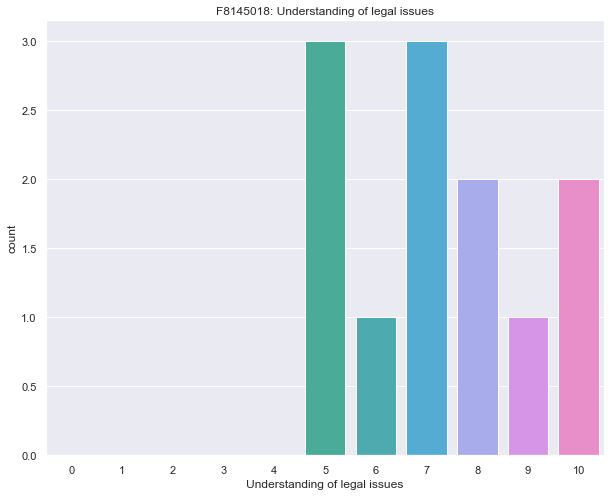

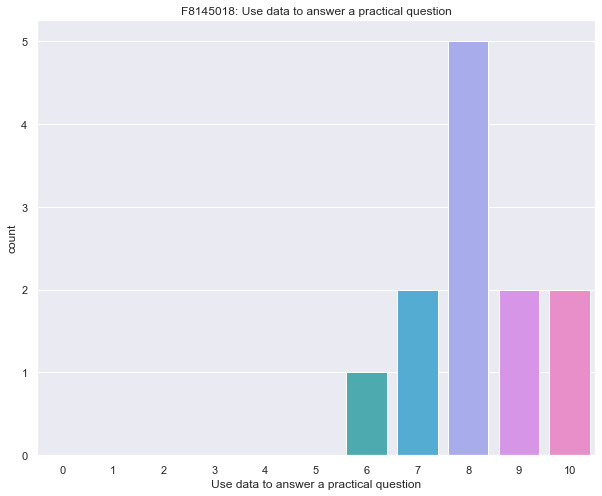

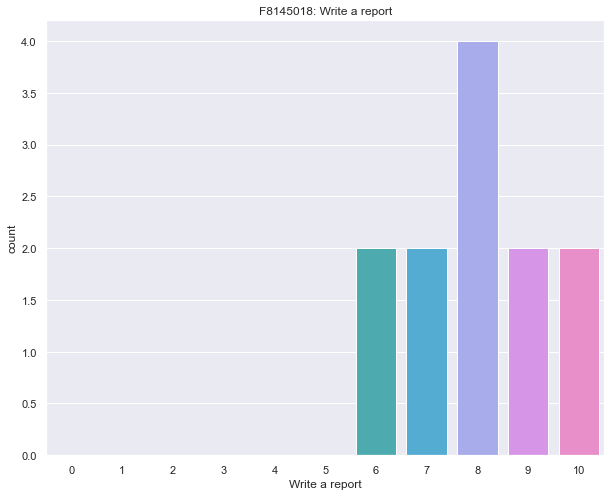

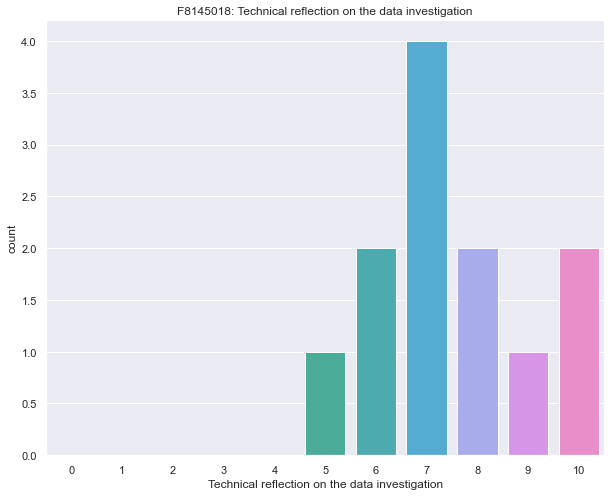

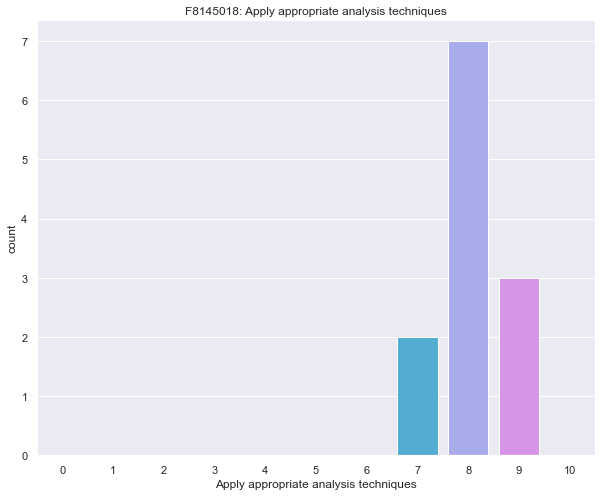







*******************************************





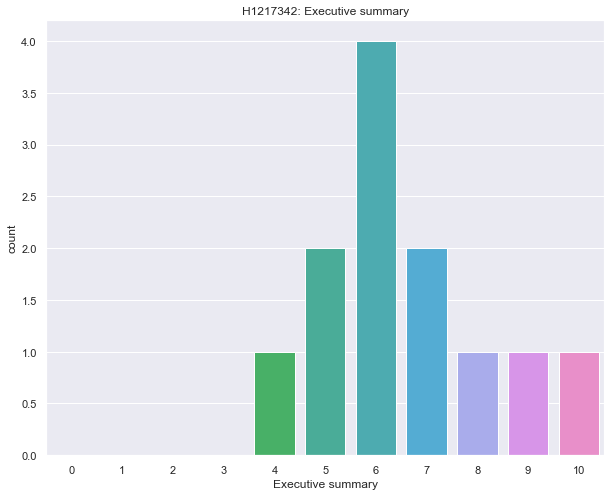

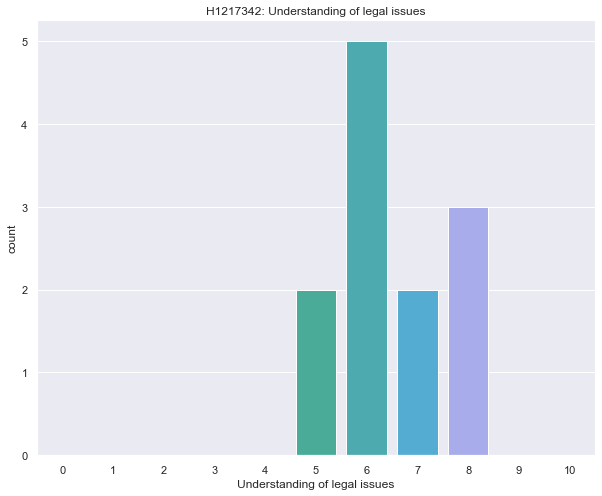

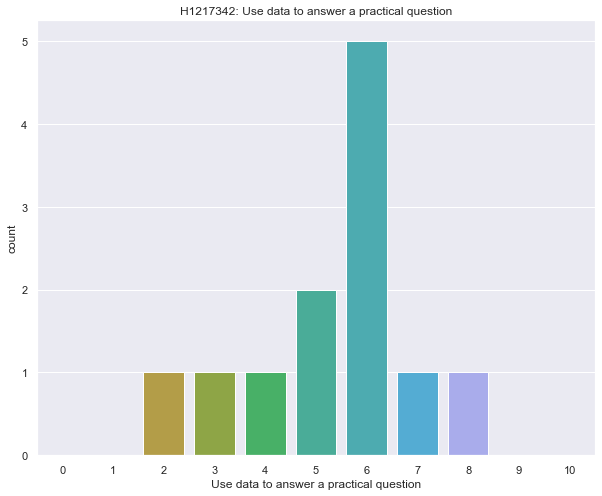

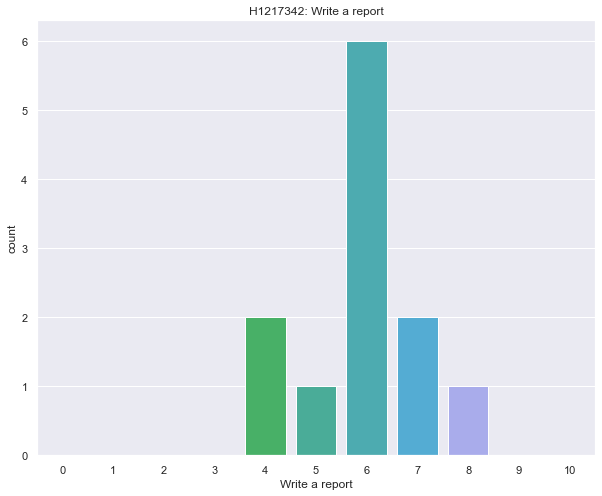

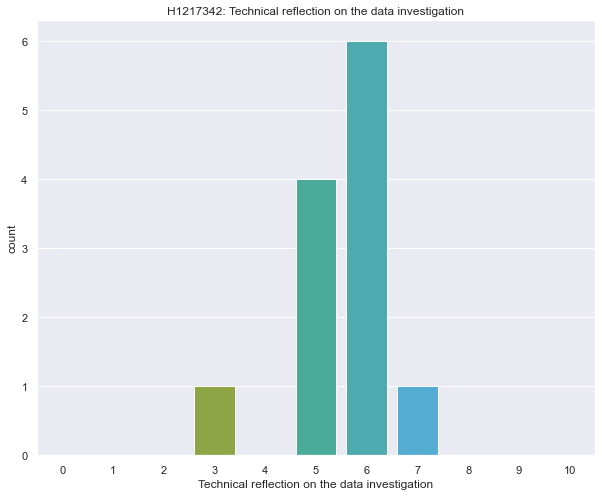

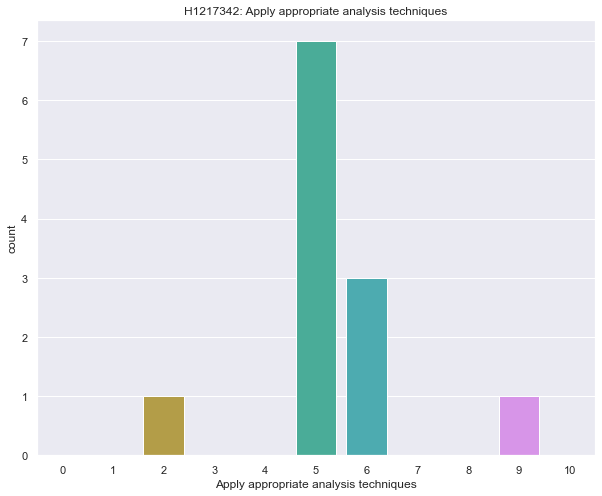







*******************************************





In [8]:
i=0

for pi in pis:
    data=(coord_data
          .filter(like='[')
          .filter(like=pi)

          .rename(lambda x:re.search('\[(.*)\]', x).group(1), axis='columns')
          .astype(str)
         )
    # print(data)
    i=data
    for cat in data.columns:
        ax=sns.countplot(x=cat,
                         data=data,
                         order=([str(l) for l in range(11)]))
        ax.set_title(f'{pi}: {cat}')
        plt.show()
        print('\n\n\n\n')
        
    print('\n*******************************************\n\n\n')